### 팔레트 추출 및 상품 매칭 통합 코드
    
    최초 작성일 : 20/04/04
    작성자 : 김은주
    
    작성내용 : 팔레트 추출 및 상품 매칭 통합 코드 (CAIProjectModule.py)
               
               personal_color_palette 모듈화 및 테스트
               -> ColorPalette클래스 (palette_bright / palette_harmony / matchedPrdt / to_rgb / show_color)
               -> DatabaseConnetion클래스(connectDB / select_prdt_color / getPrdtimage)
               
               Main_product_color_extraction 모듈화 및 테스트
               -> ColorClustering클래스 (greytone_filter / color_generator / colorClustering)
               -> DatabaseConnection클래스 (getUserPurchase)
               
               최종 리턴 필요 값 추출 코드 정리
               -> 팔레트 별 웹용 RGB 값
               -> 추천항목 별 웹용 이미지링크

    수정내용 
        20/04/06
               greytone_filter 개선
               -> 회색조 필터링 시 리턴값이 없으면 필터링 전 hsv 리턴
               colorClustering 오류 수정
               -> NearestCentroid() : 클러스터 수가 2개 미만일 때 중앙값을 찾을 수 없음
               -> 최소 클러스터 수 2개로 수정
               
        20/04/07
               matchedPrdt 개선
               -> 팔레트 별 중복되는 상품코드 발생 시 제외
               getUserPurchase 오류 수정
               -> 조회 닉네임의 구매목록이 없는 경우 오류 수정
               -> 해당 오류 발생 시 웹용 이미지링크 최종 리턴값
                   : 'error:No matched user or No matched purchase list'

        20/04/08
               ColorPalette클래스 (palette_bright / palette_harmony) 오류 수정

In [1]:
import CAIProjectModule

CP = CAIProjectModule.ColorPalette()
CD = CAIProjectModule.DatabaseConnetion()
CC = CAIProjectModule.ColorClustering()

C:\Users\acorn\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\acorn\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.nearest_centroid module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
### DB 연결
# database = {"host":"49.142.181.65", "user":"cai", "passwd":"1234", "db":"final"}
database = {"host":"192.168.0.41", "user":"cai", "passwd":"1234", "db":"final"}
# database = {"host":"localhost", "user":"root", "passwd":"1111", "db":"musinsa_test"}
cursor = CD.connectDB(database)

### PRDT_IMAGE 테이블에 H, S, V, 상품코드 조회
HSV = CD.select_prdt_color(cursor)

########################################### 컬러 팔레트 추출 #########################################
# 얼굴 측색결과 hsv 받아와야함
hsv = [20, 45, 98]
# [20, 40, 25]
############################

### 얼굴 측색값 기준 팔레트 추출 : 각 6개 색 추출
hsv_palette_bright = CP.palette_bright(hsv)
hsv_palette_harmony = CP.palette_harmony(hsv)

### 웹용 팔레트 RGB 변환 : 각 6개 색
rgb_palette_bright = CP.to_rgb(hsv_palette_bright)
rgb_palette_harmony = CP.to_rgb(hsv_palette_harmony)


########################################### 주요 구매색 추출 #########################################
# 웹에서 받아와야함
# 테스트용 DB 닉네임 (구매 많은 순)
nicknames = ["ZENG", "맥클", "말쑥2", "오케이굿잡", "추붐", "쵸롱잉", "윤뽀돌잉", "때때로", "hyunOoa",
             "siun9", "빵도니", "휘파람위히히히"]
# user_nick = nicknames[0]
user_nick = "JAY"
############################

### 유저 닉네임에 따른 구매목록 조회
purchase_prdt = CD.getUserPurchase(cursor, user_nick)
### 회색조 필터링 (흰색/검은색 상품 필터링)
purchase_hsv = CC.greytoneFilter(purchase_prdt)
### Clustering 정확도를 위한 색값 제너레이팅
purchase_HSV = CC.colorGenerator(purchase_hsv)
### Clustering 중앙값(주구매색) 리턴
centroid = CC.colorClustering(purchase_HSV)
########################################### 상품매칭 & 이미지  #########################################

### 팔레트 컬러 상품 매칭 : 각 상품코드 6개
prdtCode_bright = CP.matchedPrdt(hsv_palette_bright, HSV)
prdtCode_harmony = CP.matchedPrdt(hsv_palette_harmony, HSV)
prdtCode_purchase = CP.matchedPrdt(centroid, HSV)

### 상품 이미지링크 갖고오기 : 웹페이지 노출용 이미지링크 각 6개
imgLink_bright = CD.getPrdtimage(cursor, prdtCode_bright)
imgLink_harmony = CD.getPrdtimage(cursor, prdtCode_harmony)
imgLink_purchase = CD.getPrdtimage(cursor, prdtCode_purchase)

C:\Users\acorn\Desktop\jay\pythonwork\CAI\CAIProjectModule.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if "No matched user" in HSV:
C:\Users\acorn\Desktop\jay\pythonwork\CAI\CAIProjectModule.py:380: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if "No matched user" in personal_palette:


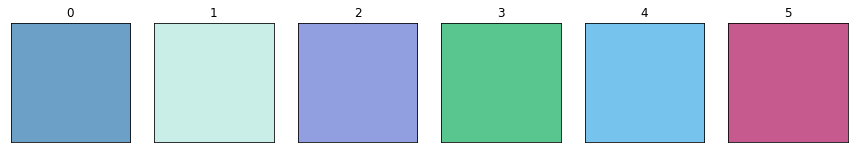

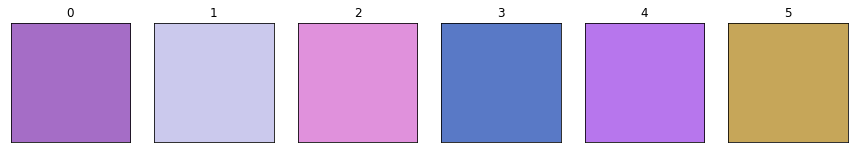

In [3]:
### 팔레트 색 확인
CP.show_colors(hsv_palette_bright)
CP.show_colors(hsv_palette_harmony)
# CP.show_colors(centroid)

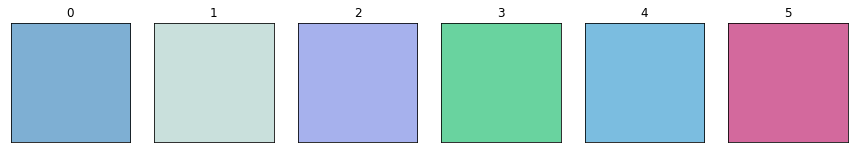

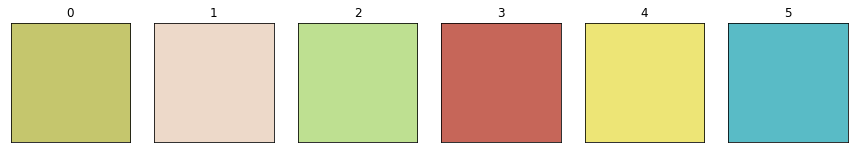

In [4]:
### 팔레트 색 확인
CP.show_colors(hsv_palette_bright)
CP.show_colors(hsv_palette_harmony)
# CP.show_colors(centroid)

In [5]:
# 웹용 컬러팔레트 RGB값
print("bright : ", rgb_palette_bright)
print("harmony : ", rgb_palette_harmony)

bright :  [[127.0, 176.0, 212.0], [202.0, 224.0, 221.0], [166.0, 177.0, 237.0], [106.0, 212.0, 159.0], [123.0, 190.0, 224.0], [212.0, 106.0, 157.0]]
harmony :  [[197.0, 199.0, 109.0], [237.0, 217.0, 202.0], [190.0, 224.0, 146.0], [199.0, 102.0, 90.0], [237.0, 230.0, 119.0], [90.0, 187.0, 199.0]]


In [6]:
# 웹용 이미지 링크
print("bright : ", imgLink_bright)
print("\nharmony : ", imgLink_harmony)
print("\npurchase : ", imgLink_purchase)

bright :  ['https://image.msscdn.net/images/goods_img/20200304/1334916/1334916_2_500.jpg', 'https://image.msscdn.net/images/goods_img/20200302/1328815/1328815_1_500.jpg', 'https://image.msscdn.net/images/goods_img/20180903/845392/845392_2_500.jpg', 'https://image.msscdn.net/images/goods_img/20200308/1340618/1340618_1_500.jpg', 'https://image.msscdn.net/images/goods_img/20200204/1290959/1290959_1_500.jpg', 'https://image.msscdn.net/images/goods_img/20200110/1268121/1268121_1_500.jpg']

harmony :  ['https://image.msscdn.net/images/goods_img/20200227/1326771/1326771_1_500.jpg', 'https://image.msscdn.net/images/goods_img/20190917/1155919/1155919_2_500.jpg', 'https://image.msscdn.net/images/goods_img/20190918/1157657/1157657_4_500.jpg', 'https://image.msscdn.net/images/goods_img/20200225/1321666/1321666_1_500.jpg', 'https://image.msscdn.net/images/goods_img/20200304/1334593/1334593_1_500.jpg', 'https://image.msscdn.net/images/goods_img/20190909/1148785/1148785_1_500.jpg']

purchase :  ['htt